In [1]:
import hashlib
import pandas as pd
import math 
import re
import random

In [2]:
# Load data
csv_file_data = 'Data/Output_v5_data.csv'
data_raw = pd.read_csv(csv_file_data, quotechar='"',low_memory=False)

#Ther was a bug in these 3 user so we put them the mean
data_raw=data_raw[data_raw['user_followers'].str.isdigit()]
data_raw['user_followers']=data_raw['user_followers'].astype('int64')
# We delete duplicates
data_raw.drop_duplicates(subset='url',keep='last',inplace=True)


In [3]:
data_raw.drop(1308012,inplace=True)
data_raw.favorite_count=data_raw.favorite_count.astype('int64')


In [4]:

#Anonimize user names
data_raw['user_screen_name']=data_raw['user_screen_name'].apply(lambda x: str(hashlib.md5(x.encode()).hexdigest()))
data_raw['text'] = data_raw['text'].apply(lambda x: re.sub(r"(?!(@realDonaldTrump)|(@JoeBiden))(@[A-Za-z0-9]+)", "", x))

#Anonimize user followers computing an index that weare going to use later to rank base in who has more user has more relevance
maxim = int(data_raw.quantile(q=0.95,axis=0).user_followers)
reg = random.randint(2000,2500) #To start the log in a random posicion
data_raw['user_followers_index']=data_raw['user_followers'].apply(lambda x: (math.log(x+reg,maxim)))
#data_raw.drop(['user_followers'],axis=1,inplace=True)
#seve the data
csv_file_data = 'Data/Output_v5_data_anonim.csv'
data_raw.to_csv(csv_file_data, quotechar='"', index=False)


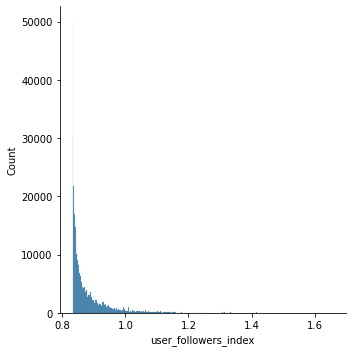

In [5]:
import seaborn as sns
sns.displot(data_raw, x="user_followers_index")

In [6]:
tweet_id=data_raw['tweet_id'].values
csv_file_hashtag = 'Data/Output_v5_hash.csv'
hash_raw =pd.read_csv(csv_file_hashtag, quotechar='"',low_memory=False, error_bad_lines=False)
hash_raw.info()
#print(hashtags_raw)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381319 entries, 0 to 381318
Data columns (total 3 columns):
tweet_id            381319 non-null int64
user_screen_name    381319 non-null object
hastags             381319 non-null object
dtypes: int64(1), object(2)
memory usage: 8.7+ MB


In [7]:

hash_raw=hash_raw[hash_raw['tweet_id'].isin(tweet_id)]
hash_raw.drop(['user_screen_name'],axis=1,inplace=True)
csv_file_hashtag = 'Data/Output_v5_hash_anonim.csv'
hash_raw.to_csv(csv_file_hashtag, quotechar='"', index=False)

In [8]:
csv_file_hashtag = 'Data/Output_v5_ment.csv'
ment_raw =pd.read_csv(csv_file_hashtag, quotechar='"',low_memory=False, error_bad_lines=False)
#print(mentions_raw)
ment_raw=ment_raw[ment_raw['tweet_id'].str.isdigit()]
ment_raw['tweet_id']=ment_raw['tweet_id'].astype('int64')

In [9]:
ment_raw=ment_raw[ment_raw['tweet_id'].isin(tweet_id)]
ment_raw['user_mentioner']=ment_raw['user_mentioner'].apply(lambda x: str(hashlib.md5(str(x).encode()).hexdigest()))
ment_raw['user_mentionated']=ment_raw['user_mentionated'].apply(lambda x: str(hashlib.md5(str(x).encode()).hexdigest()))


csv_file_hashtag = 'Data/Output_v5_ment_anonim.csv'
ment_raw.to_csv(csv_file_hashtag, quotechar='"', index=False)